# Primer on Markov Chain

A **stochastic process** is a collection of random variables (scalar, vectors ,matrices...) defines in a state space $S$ (e.g.: $\mathbb{R},\mathbb{R}^k$) index by a arbitrary set $\mathcal{I}$

$$\{X_i,i\in\mathcal{I}\}$$

A discrete-time stochastic process ($\mathcal{I}=\mathbb{N}$) is said to have the ***Markov property*** if 

$$P(X_n=x_n|X_{n-1}=x_{n-1},X_{n-2}=x_{n-2}\dots)= P(X_n=x_n|X_{n-1}=x_{n-1}),$$

a stochastic process that possess the Markov property is called a **Markov Chain** or Markov Process. 

We call a ***Homogeneous Markov Chain*** when the Markov property does not depend upon $n$, i.e.:

$$P(X_{n+1}=x|X_{n}=y) = P(X_n=x|X_{n-1}=y)\quad\forall n\in\mathbb{N}$$

For a discrete state space $S={1,2,\dots, d}$ we can represent a homogeneous Markov chain with a square $K$ matrix of size $d$ such that 

$$K(n\times n), \text{ where } K(i,j)=P(X_n=j|X_{n-1}=i) \text{ and } \sum_{j=1}^d k_{ij}=1, i=1,\dots d$$

such a matrix is called the ***transition kernel***. In that case $K(i,j)$ denotes the probability of moving from state $i$ to state $j$.

For the continuous case we also denote the conditional density as as a transition kernel, where $K(x,y)$ denotes the density of moving from $x$ to $y$. However, the relation to the probability is given by

$$P(X\in A|x)=\int_A K(x,y)\mathrm{d}y$$




**Example:** Discrete 3-state Markov Chain Example $S=\{1=Bull; 2=Bear; 3=Stagnant\}$

<img src="Bullbear.svg">

How does the chain evolves? Take a starting point (or distribution)

$$p^{(0)}=(1/3, 1/3, 1/3)$$

Then $p^{(1)}= p^{(0)}K$, and $p^{(2)}= p^{(1)}K=p^{(0)}K^2$ and so on..., Such that

$$p^{(n)}= p^{(0)}K^n,\quad\forall n\in\mathbb{N}$$

A **stationary distribution** $p$ of a kernel $K$ is defined by:

$$p=pK$$

A few more definitions regarding Markov Chain can be formalized using the concept of starting from an arbitrary state $x$ the probability of the ever reaching the state $y$ in subsequent steps of the chain. Let denote $T_y$ the first time $y$ is visited, hence the probability of a chain starting from state $x$ hitting the state $y$ at any posterior step is given by

$$\rho(x,y)=P_x(T_y<\infty)$$

Now a state $y$ is said to be **recurrent** if a Markov Chain starting at $y$ returns to $y$ with probability 1, $\rho(y,y)=1$ and is said to **transient** if there is a positive probability of not returning to $y$, $\rho(y,y)<1$. 

A chain is said to be **irreducible** if every state can be achieved any starting state with positive probability, $\rho(x,y)>0,\forall (x,y)$

A chain is said to be **aperiodic** if the return to any state occurs in irregular (non-periodic) number of steps. 

A sufficient condition for $p$ to be the stationary distribution of a given kernel $K$ is called the ***detailed balance condition*** given by

$$K(x,y)p(y)=K(y,x)p(x),\quad\forall (x,y)$$

which together with an irreducible and aperiodic Markov Chain results in the convergence in distribution of the Chain to the posterior



In [54]:
# Function to raise a matrix to the n-th power
MatPower<-function(A,n){ 
  if(n==1) A else {B=A; for(i in (2:n)){A=A%*%B}};A
  } 


# Simple Transition Matrix
K = matrix(c(0.9,0.075,0.025,0.15,0.8,0.05,0.25,0.25,0.5),3,3)
K=t(K)
K
eigen(K)
J = MatPower(K,200)
J

0.90,0.075,0.025
0.15,0.800,0.050
0.25,0.250,0.500


0.5773503,0.4437186,-0.03400257
0.5773503,-0.8113071,-0.13017638
0.5773503,-0.3806504,0.99090763


0.625,0.3125,0.0625
0.625,0.3125,0.0625
0.625,0.3125,0.0625


# Markov Chain Monte Carlo

**Definition: ** A Markov Chain Monte Carlo (MCMC) method for simulation of a distribution $p$ is any simulation method that produce an ergodic Markov Chain whose stationary distribution if $p$.

Broadly speaking a MCMC algorithm works as follows: from an arbitrary starting point $x^{(0)}$, a markov chain $(x^{(t)})_t$ is generated using a transition kernel with stationary distribution $p$, which ensures the convergence in distribution of $(X^{(t)})_t$ to $p$. Given the chain is ergodic, the starting value does not matter

---
**Metropolis-Hastings Algoritm**

Guess $\theta^{(0)}$ and for $i=0$ until $n$: 
1. $\theta=\theta^{(i)}$
Draw $\theta'\sim q(\theta'|\theta)$
2. Compute $r=\min(1,\alpha)$ where $\alpha= \frac{p(\theta')q(\theta|\theta')}{p(\theta)q(\theta'|\theta)}$
4. Draw $u\sim U(0,1)$
5. $\theta^{(i+1)}=\begin{cases}\theta' & \text{if $u<r$}\\\theta & \text{if $u\geq r$}\end{cases}$

---

Notice that given two states $(\theta',\theta)$ the probability of accepting the movement from $\theta$ to $\theta'$ is given by

$$P(\text{ Accept a move })= P(u<r)=r\equiv r(\theta'|\theta)$$

thus we can write the MH Kernel as

$$K(\theta,\theta')=q(\theta'|\theta)r(\theta'|\theta)+1\{\theta'=\theta\}\int q(\theta'|\theta)\left(1-r(\theta'|\theta)\right)\mathrm{d}\theta'  $$

To show that the stationary distribution of the MH Kernel above is actually the posterior $p$ consider without loss of generality that two states $(\theta',\theta)$ result in $p(\theta)q(\theta'|\theta)>p(\theta')q(\theta|\theta')$, hence $\alpha<1$ and consequently $r(\theta'|\theta)=\alpha$ and $r(\theta|\theta')=1$ since $r=\min(1,\alpha)$. Thus

$$K(\theta,\theta')=q(\theta'|\theta)r(\theta'|\theta)=\frac{p(\theta')q(\theta|\theta')}{p(\theta)}\iff p(\theta)K(\theta,\theta')=p(\theta')q(\theta|\theta')$$

Since $K(\theta',\theta)=q(\theta|\theta')r(\theta|\theta')= q(\theta|\theta')$, we conclude that 

$$p(\theta)K(\theta,\theta')=p(\theta')K(\theta',\theta)$$

Therefore the stationarity of $p$ is established for any proposal distribution $q$ that satisfies this minimum requirement

$$\text{support $(p)$}\subseteq \text{support $\left(\bigcup_\theta q(.|\theta)\right)$ }$$

This condition can translated as: $q$ is admissible if it has positive probability to move the Markov Chain to areas where the posterior has positive density. In practice, we choose an easy to sample $q$. There are also some convergence consideration that we will discuss further on.

### Random Walk Chains

If we set our moves in a random walk fashion as in

$$\theta'=\theta +\nu,\quad \nu\sim f_{\nu}$$

then, we have that the proposal density becomes

$$q(\theta'|\theta)=f_\nu(\theta'-\theta)$$

If $\nu$ has a symmetric distribution around $0$, i,e. $f_\nu(x)=f_\nu(-x)$, we have the a symmetric proposal distribution since

$$q(\theta'|\theta)=f_\nu(\theta'-\theta)=f_\nu(\theta-\theta')=q(\theta|\theta')$$

In that case the the Hasting Correction term $\frac{q(\theta|\theta')}{q(\theta'|\theta)}=1$ consequently $\alpha=\frac{p(\theta')}{p(\theta)}$ and the acceptance probability simply to

$$r = min\left(1,\frac{p(\theta')}{p(\theta)}\right) $$

In [39]:
# Random Walk Mestropolis-Hastings Function
RWMH = function(p # distribution we want to sample
              , q  # proposal distribution of the RW inovation 
              , n   # iterations
               ){
  y = rep(NA,n)
  accepted = rep(0,n)
  y[1] = 0    # starting location for random walk
  
  for(i in 2:n)    {
    y.prop = y[i-1]+q() # implementation assumes a random walk. 
                            
    # We work with the log-likelihoods for numeric stability.
    log_alpha = log(p(y.prop)) - log(p(y[i-1]))    

    R = min(1,exp(log_alpha))

    u = runif(1)        ## uniform variable to determine acceptance
    if(u < R){           ## accept the new value
      y[i] = y.prop
      accepted[i] = 1
    }    
    else{
      y[i] = y[i-1]      ## reject the new value
    }    
  }
  return(list(y, accepted))
}

The most used choices for the density of $\nu$ are normal and t-Distribution centered at the origin. The dispersion parameter (variance) cen be set as $kV$ where $k>0$ can be used as a tunning parameter to control the acceptance ratio and $V$ is an approximation for the posterior variance. In that way the moves along the components of $\theta$ are ajusted to the their relative dispersion. 


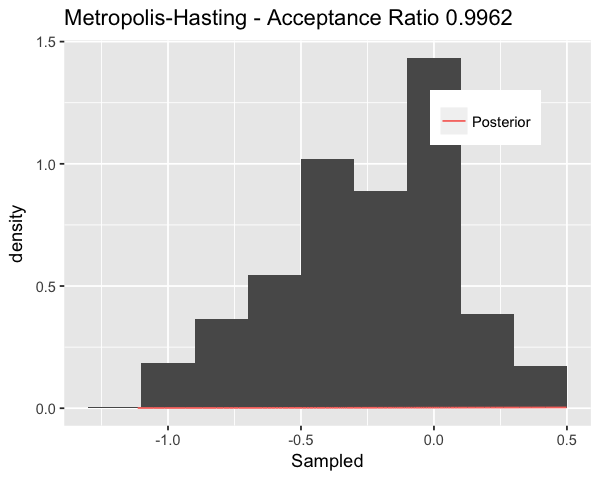

In [57]:
phi = 0.5   # Mixing coefficient of the Posterior
p = function(x){phi*(dnorm(x,-5,1)+(1-phi)*dnorm(x,7,3))}   # Posterior = Target Function
k = 0.01
q = function(){rnorm(1, 0, k )}
n = 1e4

result <- RWMH(p, q, n) # Call the Random Walk Mestropolis-Hastings Function
chain = result[[1]]
burn_in = 0.1
chain = chain[-c(1:floor(burn_in*n))]
ratio = mean(result[[2]])
# Plotting
library(ggplot2)
library(repr)

options(repr.plot.width=5, repr.plot.height=4)

true = p(chain)
data = data.frame(chain,true)
ggplot(data, aes(x = chain)) + 
  geom_histogram(aes(y=..density..),binwidth = 0.2) +
  geom_line(aes(y = true, colour = "Posterior")) +
  theme(legend.position = c(0.8, 0.8)) +
  theme(legend.title=element_blank()) +
  ggtitle(paste("Metropolis-Hasting - Acceptance Ratio", ratio)) +
      xlab("Sampled")



### Independent Chains
When the proposed transition $q(\theta'|\theta)$ is set independent of the current possiton $\theta$ we have an independent chain. 

$$q(\theta'|\theta)=q(\theta')$$

Be careful the independence is only with respect to the moves but not to the chain itself. Recall the acceptance of the move is still dependent on the current position so the Markovian process is preserved. In that case the we have

$$\alpha= \frac{p(\theta')q(\theta)}{p(\theta)q(\theta')}$$

A common choice for $q$ in this sitution is the prior $q(\theta)=\pi(\theta)$ in that case $\alpha$ becomes the likelyhood ratio $\frac{f(\theta')}{f(\theta)}$ and the acceptance ration is given by

$$r = min\left(1,\frac{f(\theta')}{f(\theta)}\right) $$
